In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("penguins_size.csv")

In [3]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# CHECKING ROWS AND COLUMNS AND DESCRIPTIVE STATISTICS

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# CHECKING ALL COLUMNS AND THEIR MISSING VALUES

In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

#  EXPLORATERY DATA ANALYSIS(EDA) 


## FILLING AND DROPING missing value rows as per the Rule

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
si=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["sex"]=si.fit_transform(df[["sex"]])

In [9]:
df.dropna(inplace=True)

In [10]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


## CHECKING CORELATION AND OUTLIERS

In [12]:
df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [13]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


# PLOTING BOX PLOT FOR DETECTING OUTLIERS

### Outliers : outliers are the unusual datapoints we drop them

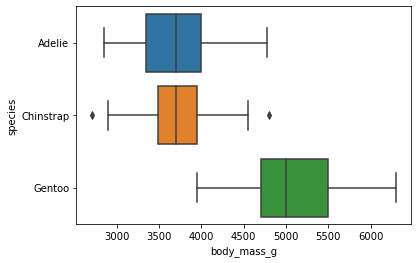

In [14]:
sns.boxplot(data=df,x=df["body_mass_g"],y=df["species"])
plt.show()

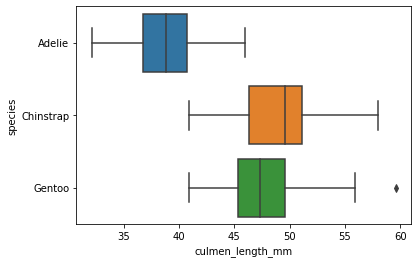

In [15]:
sns.boxplot(data=df,x=df["culmen_length_mm"],y=df["species"])
plt.show()

# FOR CULMEN_LENGHT_MM

In [16]:
df[(df["species"]=="Gentoo")&(df["culmen_length_mm"]>55)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,MALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE


In [17]:
df.drop([253,321,335],inplace=True)

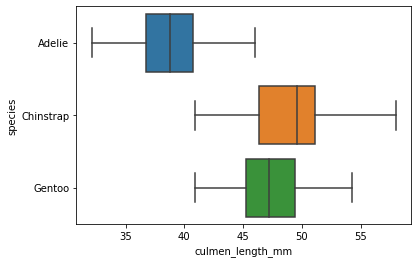

In [18]:
sns.boxplot(data=df,x=df["culmen_length_mm"],y=df["species"])
plt.show()

# FOR culmen_depth_mm

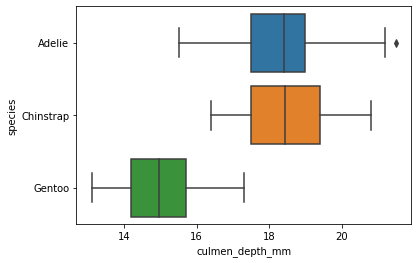

In [19]:
sns.boxplot(data=df,x=df["culmen_depth_mm"],y=df["species"])
plt.show()

In [20]:
df[(df["species"]=="Adelie")&(df["culmen_depth_mm"]>21)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,MALE
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,MALE
35,Adelie,Dream,39.2,21.1,196.0,4150.0,MALE
49,Adelie,Dream,42.3,21.2,191.0,4150.0,MALE
61,Adelie,Biscoe,41.3,21.1,195.0,4400.0,MALE


In [21]:
df.drop([13,14,19,35,49,61],inplace=True)

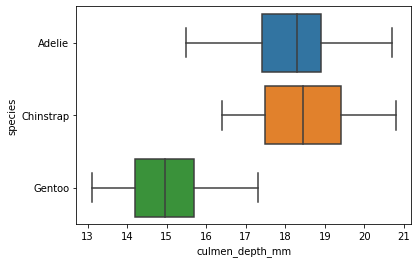

In [22]:
sns.boxplot(data=df,x=df["culmen_depth_mm"],y=df["species"])
plt.show()

# for flipper_length_mm

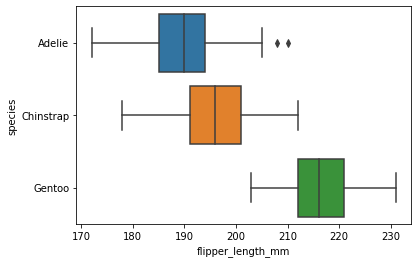

In [23]:
sns.boxplot(data=df,x=df["flipper_length_mm"],y=df["species"])
plt.show()

In [24]:
df[(df["species"]=="Adelie")&(df["flipper_length_mm"]>202)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
91,Adelie,Dream,41.1,18.1,205.0,4300.0,MALE
95,Adelie,Dream,40.8,18.9,208.0,4300.0,MALE
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,MALE
129,Adelie,Torgersen,44.1,18.0,210.0,4000.0,MALE


In [25]:
df.drop([91,95,101,129],inplace=True)

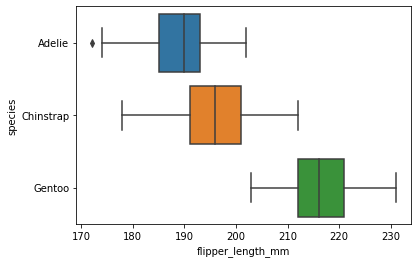

In [26]:
sns.boxplot(data=df,x=df["flipper_length_mm"],y=df["species"])
plt.show()

In [27]:
df[(df["species"]=="Adelie")&(df["flipper_length_mm"]<175)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
20,Adelie,Biscoe,37.8,18.3,174.0,3400.0,FEMALE
28,Adelie,Biscoe,37.9,18.6,172.0,3150.0,FEMALE


In [28]:
df.drop([20,28],inplace=True)

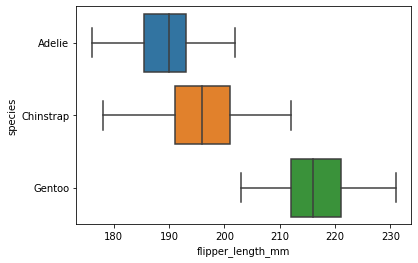

In [29]:
sns.boxplot(data=df,x=df["flipper_length_mm"],y=df["species"])
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            327 non-null    object 
 1   island             327 non-null    object 
 2   culmen_length_mm   327 non-null    float64
 3   culmen_depth_mm    327 non-null    float64
 4   flipper_length_mm  327 non-null    float64
 5   body_mass_g        327 non-null    float64
 6   sex                327 non-null    object 
dtypes: float64(4), object(3)
memory usage: 28.5+ KB


# Checking skewness

In [31]:
colname=df.select_dtypes("float64").columns

In [32]:
colname

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [33]:
from scipy.stats import skew

culmen_length_mm
-0.054334593902514015


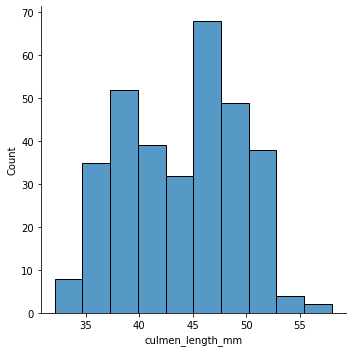

culmen_depth_mm
-0.19461775248220767


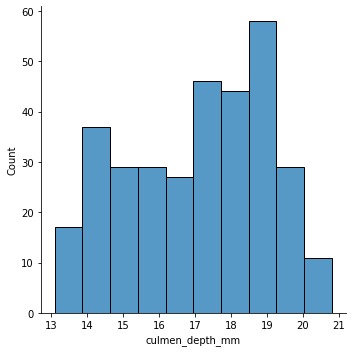

flipper_length_mm
0.35288548324515734


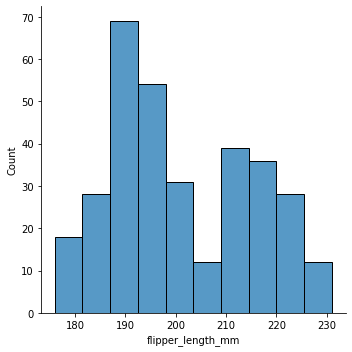

body_mass_g
0.460774564647384


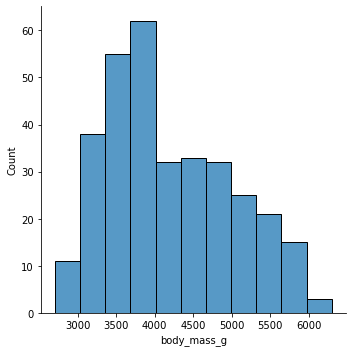

In [34]:
for col in df[colname]:
    print(col)
    print(skew(df[col]))
    
    sns.displot(df[col])
    plt.show()
    
    

# SEPARATING X AND Y

In [35]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [36]:
x=df.iloc[:,1:]

In [37]:
x

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [38]:
y=df.iloc[:,0]

In [39]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 327, dtype: object

# OUR X ARE THE FEATURES AND Y IS OUR TARGET

In [40]:
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [41]:
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

# HANDLING CATEGORICAL DATA

In [42]:
obj=x.select_dtypes("object").columns

In [43]:
#obj

In [44]:
from sklearn.preprocessing import OrdinalEncoder

In [45]:
oe=OrdinalEncoder()

In [46]:
x[['island','sex']]=oe.fit_transform(x[['island', 'sex']])

In [47]:
#x

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le=LabelEncoder()

In [50]:
y=le.fit_transform(y)

In [51]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

# SCALING

In [52]:
#x.head()

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
#sc=StandardScaler()

In [55]:
#x=sc.fit_transform(x)

In [56]:
#x

In [57]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [61]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


# VISUALIZATION

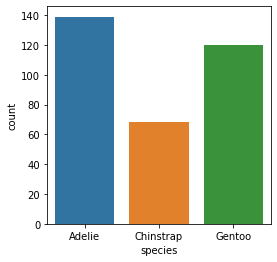

In [67]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="species")
plt.show()

## THERE ARE 3 SPECIES AND THE MAXIMUM NUMBER OF SPECIES ARE ADELIE AND MIN NUMBER OF SPECIES ARE GENTOO

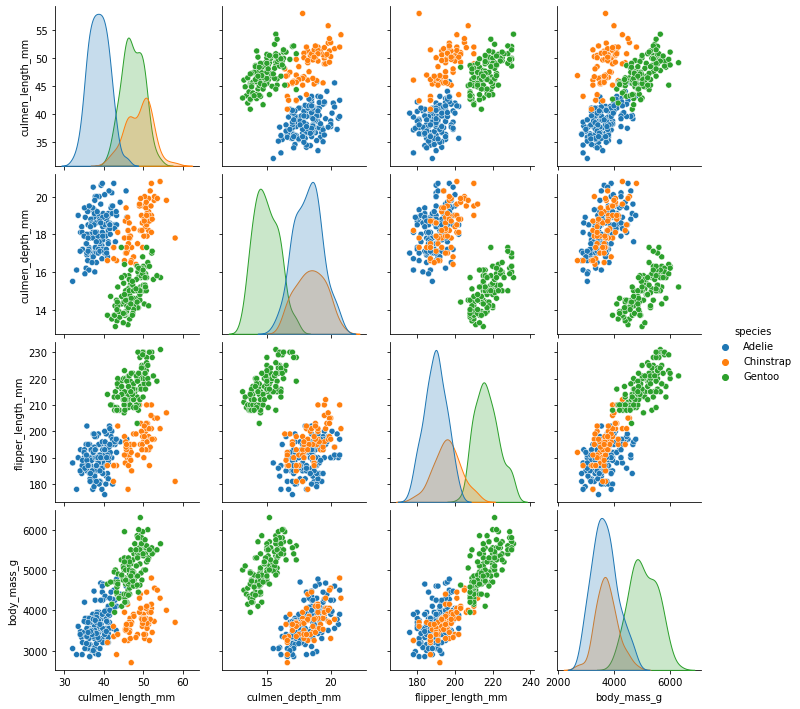

In [68]:
sns.pairplot(df,hue="species")
plt.show()

<AxesSubplot:>

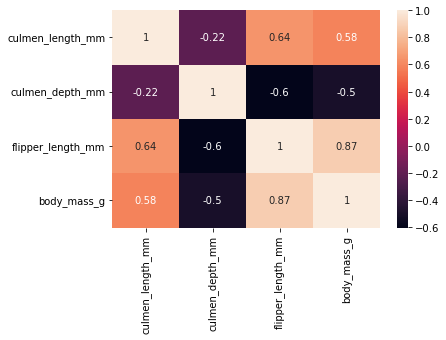

In [69]:
sns.heatmap(df.corr(),annot=True)

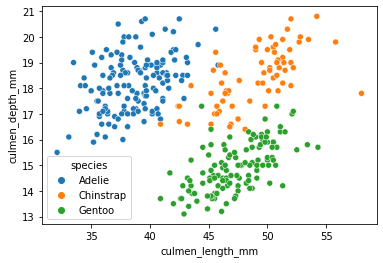

In [70]:
sns.scatterplot(data=df,x=df["culmen_length_mm"],y=df["culmen_depth_mm"],hue="species")
plt.show()

## 1) most of the ADELIE species of penguins culmen depth lies between 16 to 21 and culmen lenght lies between 35 to 44
## 2) most of the CHINSTRAP species of penguins culmen depth lies between 17 to 20 and culmen lenght lies between 42 to 55
## 3) most of the GENTOO species of penguins culmen depth lies between 17 to 20 and culmen lenght lies between 40 to 55

# NOW WE ARE GOPING TO SPLIT OUR DATA BY TRAIN_TEST_SPLIT

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [72]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [73]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f"Training Acuuracy(bias):- {train}\n Testing Accuracy(variance):- {test}")
    
    print(classification_report(ytest,ypred))
    return model
    
    
    
    
    

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [75]:
knn = mymodel(KNeighborsClassifier())

Training Acuuracy(bias):- 0.8508771929824561
 Testing Accuracy(variance):- 0.8282828282828283
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        44
           1       0.69      0.45      0.55        20
           2       0.97      0.94      0.96        35

    accuracy                           0.83        99
   macro avg       0.81      0.77      0.78        99
weighted avg       0.82      0.83      0.82        99



In [76]:
logreg = mymodel(LogisticRegression())

Training Acuuracy(bias):- 0.9868421052631579
 Testing Accuracy(variance):- 0.9696969696969697
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        44
           1       0.95      0.90      0.92        20
           2       1.00      1.00      1.00        35

    accuracy                           0.97        99
   macro avg       0.97      0.96      0.96        99
weighted avg       0.97      0.97      0.97        99



In [77]:
s=mymodel(SVC())

Training Acuuracy(bias):- 0.7236842105263158
 Testing Accuracy(variance):- 0.7474747474747475
              precision    recall  f1-score   support

           0       0.65      0.93      0.77        44
           1       0.00      0.00      0.00        20
           2       0.92      0.94      0.93        35

    accuracy                           0.75        99
   macro avg       0.52      0.62      0.57        99
weighted avg       0.61      0.75      0.67        99



In [78]:
dt = mymodel(DecisionTreeClassifier())

Training Acuuracy(bias):- 1.0
 Testing Accuracy(variance):- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        35

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [79]:
randomf= mymodel(RandomForestClassifier())

Training Acuuracy(bias):- 1.0
 Testing Accuracy(variance):- 0.98989898989899
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        35

    accuracy                           0.99        99
   macro avg       0.99      0.98      0.99        99
weighted avg       0.99      0.99      0.99        99



# AFER  SCAILING PERFORMANCE OF THE MODELS

In [80]:
sc = StandardScaler()

xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [81]:
knn = mymodel(KNeighborsClassifier())

Training Acuuracy(bias):- 0.9956140350877193
 Testing Accuracy(variance):- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        35

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [82]:
logreg = mymodel(LogisticRegression())

Training Acuuracy(bias):- 0.9956140350877193
 Testing Accuracy(variance):- 0.98989898989899
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        35

    accuracy                           0.99        99
   macro avg       0.99      0.98      0.99        99
weighted avg       0.99      0.99      0.99        99



In [83]:
randomf= mymodel(RandomForestClassifier())

Training Acuuracy(bias):- 1.0
 Testing Accuracy(variance):- 0.98989898989899
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        35

    accuracy                           0.99        99
   macro avg       0.99      0.98      0.99        99
weighted avg       0.99      0.99      0.99        99



# FORECASTING NEW OBSERVATION

In [106]:
def predictspecies():
    island=int(input("enter island as 0.0=Biscoe,1.0=Dream(enter numbers),2.0=Torgersen :"))
    culmen_length_mm=int(input("enter length of culmen :"))
    culem_depth_mm=int(input("enter depth of culmen :"))
    flipper_length_mm=int(input("enter flipper length :"))
    body_mass_g=int(input("enter body mass :"))
    sex=int(input("enter gender female=1.0 and male=2.0 :"))
    
    newob=[island,culmen_length_mm,culem_depth_mm,flipper_length_mm,body_mass_g,sex]
    v=logreg.predict([newob])[0]
    
    if v==0:
        print("Adlie Species")
    elif v==1:
        print("chinsrtap species")
    else:
        print("Gento species")
    
    
    

In [88]:
x.tail()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
338,0.0,47.2,13.7,214.0,4925.0,1.0
340,0.0,46.8,14.3,215.0,4850.0,1.0
341,0.0,50.4,15.7,222.0,5750.0,2.0
342,0.0,45.2,14.8,212.0,5200.0,1.0
343,0.0,49.9,16.1,213.0,5400.0,2.0


array(['MALE', 'FEMALE', '.'], dtype=object)

In [107]:
predictspecies()

enter island as 0.0=Biscoe,1.0=Dream(enter numbers),2.0=Torgersen :0
enter length of culmen :50
enter depth of culmen :15
enter flipper length :222
enter body mass :5000
enter gender female=1.0 and male=2.0 :2
Gento species


In [105]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
0 = adelie
1= chinsrtap
2 =Gento
